In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [53]:
# humane = pd.read_csv("C:/Users/zhang/Desktop/NYU/2019 Fall/Humane/processed_data.csv", index_col = 0)

In [54]:
# x_train, x_test, y_train, y_test = train_test_split(humane.drop('label', axis = 1), humane['label'], test_size = 0.2)

In [55]:
# train = pd.merge(x_train, y_train, left_index = True, right_index = True)
# test = pd.merge(x_test, y_test, left_index = True, right_index =  True)

In [56]:
# train.to_csv('train.csv')
# test.to_csv('test.csv')

In [3]:
train = pd.read_csv('train.csv', index_col = 0)
test = pd.read_csv('test.csv', index_col = 0)

In [4]:
x_train = train.drop('label', axis = 1)
y_train = train['label']
x_test = test.drop('label', axis = 1)
y_test = test['label']

## Random Forest

In [59]:
parameters_rf = {'n_estimators' : [50, 100, 200, 500], 'max_depth' : [10, 50, 100, 200], 'min_samples_leaf' : [10, 20, 50, 100]}
rf = RandomForestClassifier(criterion = 'entropy')
clf_rf = GridSearchCV(rf, parameters_rf, cv = 5, scoring = 'roc_auc')
clf_rf.fit(x_train.drop('id', axis = 1), y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                

In [60]:
clf_rf.best_estimator_ 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
print('Validation auc is ' + str(clf_rf.best_score_ ))

Validation auc is 0.7767087095266395


In [62]:
test_auc_rf = roc_auc_score(y_test, clf_rf.predict_proba(x_test.drop('id', axis = 1))[:, 1])
print('Test auc is ' + str(test_auc_rf))

Test auc is 0.7955887347226029


## Elastic Net

In [102]:
scaler = StandardScaler()
scaler.fit(x_train.drop('id', axis = 1))
scaled_x_train = pd.DataFrame(scaler.transform(x_train.drop('id', axis = 1)), columns = x_train.columns[1:])
scaled_x_test = pd.DataFrame(scaler.transform(x_test.drop('id', axis = 1)), columns = x_test.columns[1:])

In [64]:
parameters_lr = {'C' : [0.01, 0.1, 1, 10, 100], 'l1_ratio' : [0.2, 0.5, 0.8]}
# parameters_en = {'C' : [0.01], 'l1_ratio' : [0.2]}
lr = LogisticRegression(penalty = 'elasticnet', max_iter = 5000, solver = 'saga')
clf_lr = GridSearchCV(lr, parameters_lr, cv = 5, scoring = 'roc_auc')
clf_lr.fit(scaled_x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='warn',
                                          n_jobs=None, penalty='elasticnet',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.2, 0.5, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [65]:
clf_lr.best_estimator_ 

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.8, max_iter=5000,
                   multi_class='warn', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
print('Validation auc is ' + str(clf_lr.best_score_ ))

Validation auc is 0.7628835391915901


In [67]:
test_auc_lr = roc_auc_score(y_test, clf_lr.predict_proba(scaled_x_test)[:, 1])
print('Test auc is ' + str(test_auc_lr))

Test auc is 0.7787038097848992


## Gradient Boosting

In [68]:
parameters_gb = {'n_estimators' : [100, 500], 'max_depth' : [10, 100]}
gb = GradientBoostingClassifier()
clf_gb = GridSearchCV(gb, parameters_gb, cv = 5, scoring = 'roc_auc')
clf_gb.fit(x_train.drop('id', axis = 1), y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [69]:
clf_gb.best_estimator_ 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [70]:
print('Validation auc is ' + str(clf_gb.best_score_ ))

Validation auc is 0.7637342366030031


In [71]:
test_auc_gb = roc_auc_score(y_test, clf_gb.predict_proba(x_test.drop('id', axis = 1))[:, 1])
print('Test auc is ' + str(test_auc_gb))

Test auc is 0.7786276018118063


## MLP

In [6]:
parameters_mlp = {'alpha' : [0.01, 0.1, 1, 10]}
mlp = MLPClassifier(hidden_layer_sizes = (100, 30), batch_size = 32)
clf_mlp = GridSearchCV(mlp, parameters_mlp, cv = 5, scoring = 'roc_auc')
clf_mlp.fit(scaled_x_train, y_train)

D:\Downloads\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size=32, beta_1=0.9, beta_2=0.999,
                                     early_stopping=False, epsilon=1e-08,
                                     hidden_layer_sizes=(100, 30),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None, param_grid={'alpha': [0.01, 0.1, 1, 10]},
             pre_dispatch

In [7]:
clf_mlp.best_estimator_ 

MLPClassifier(activation='relu', alpha=1, batch_size=32, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [8]:
print('Validation auc is ' + str(clf_mlp.best_score_ ))

Validation auc is 0.7615448082856288


In [9]:
test_auc_mlp = roc_auc_score(y_test, clf_mlp.predict_proba(scaled_x_test)[:, 1])
print('Test auc is ' + str(test_auc_mlp))

Test auc is 0.7786900002864192


## SVD

In [49]:
U, sig, Vt = np.linalg.svd(scaled_x_train)

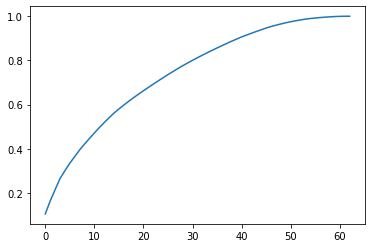

In [50]:
plt.plot(np.cumsum(sig**2)/np.sum(sig**2))

In [63]:
from sklearn.decomposition import TruncatedSVD

In [90]:
svd = TruncatedSVD(n_components = 30)
svd.fit(scaled_x_train)

TruncatedSVD(algorithm='randomized', n_components=30, n_iter=5,
             random_state=None, tol=0.0)

In [93]:
best_features = [scaled_x_train.columns[i] for i in svd.components_[0].argsort()[::-1][:30]]

In [105]:
x_train_svd = x_train[best_features]
x_test_svd = x_test[best_features]
scaled_x_train_svd = scaled_x_train[best_features]
scaled_x_test_svd = scaled_x_test[best_features]

## SVD Random Forest

In [106]:
parameters_rf = {'n_estimators' : [50, 100, 200, 500], 'max_depth' : [10, 50, 100, 200], 'min_samples_leaf' : [10, 20, 50, 100]}
rf = RandomForestClassifier(criterion = 'entropy')
clf_rf = GridSearchCV(rf, parameters_rf, cv = 5, scoring = 'roc_auc')
clf_rf.fit(x_train_svd, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                

In [107]:
clf_rf.best_estimator_ 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
print('Validation auc is ' + str(clf_rf.best_score_ ))

Validation auc is 0.7772191407990591


In [109]:
test_auc_rf = roc_auc_score(y_test, clf_rf.predict_proba(x_test_svd)[:, 1])
print('Test auc is ' + str(test_auc_rf))

Test auc is 0.7960311501368675


## SVD Elastic Net 

In [110]:
parameters_lr = {'C' : [0.01, 0.1, 1, 10, 100], 'l1_ratio' : [0.2, 0.5, 0.8]}
# parameters_en = {'C' : [0.01], 'l1_ratio' : [0.2]}
lr = LogisticRegression(penalty = 'elasticnet', max_iter = 5000, solver = 'saga')
clf_lr = GridSearchCV(lr, parameters_lr, cv = 5, scoring = 'roc_auc')
clf_lr.fit(scaled_x_train_svd, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='warn',
                                          n_jobs=None, penalty='elasticnet',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.2, 0.5, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [111]:
clf_lr.best_estimator_ 

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.8, max_iter=5000,
                   multi_class='warn', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
print('Validation auc is ' + str(clf_lr.best_score_ ))

Validation auc is 0.7630510310147003


In [113]:
test_auc_lr = roc_auc_score(y_test, clf_lr.predict_proba(scaled_x_test_svd)[:, 1])
print('Test auc is ' + str(test_auc_lr))

Test auc is 0.7792224331722566


## SVD Gradient Boosting 

In [114]:
parameters_gb = {'n_estimators' : [100, 500], 'max_depth' : [10, 100]}
gb = GradientBoostingClassifier()
clf_gb = GridSearchCV(gb, parameters_gb, cv = 5, scoring = 'roc_auc')
clf_gb.fit(x_train_svd, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [115]:
clf_gb.best_estimator_ 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [116]:
print('Validation auc is ' + str(clf_gb.best_score_ ))

Validation auc is 0.7635802484000859


In [117]:
test_auc_gb = roc_auc_score(y_test, clf_gb.predict_proba(x_test_svd)[:, 1])
print('Test auc is ' + str(test_auc_gb))

Test auc is 0.7698902809772623


## SVD MLP

In [123]:
parameters_mlp = {'alpha' : [0.01, 0.1, 1, 10]}
mlp = MLPClassifier(hidden_layer_sizes = (100, 30), batch_size = 32, max_iter = 1000)
clf_mlp = GridSearchCV(mlp, parameters_mlp, cv = 5, scoring = 'roc_auc')
clf_mlp.fit(scaled_x_train_svd, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size=32, beta_1=0.9, beta_2=0.999,
                                     early_stopping=False, epsilon=1e-08,
                                     hidden_layer_sizes=(100, 30),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=1000,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None, param_grid={'alpha': [0.01, 0.1, 1, 10]},
             pre_dispatc

In [124]:
clf_mlp.best_estimator_ 

MLPClassifier(activation='relu', alpha=0.1, batch_size=32, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [125]:
print('Validation auc is ' + str(clf_mlp.best_score_ ))

Validation auc is 0.77291807692052


In [126]:
test_auc_mlp = roc_auc_score(y_test, clf_mlp.predict_proba(scaled_x_test_svd)[:, 1])
print('Test auc is ' + str(test_auc_mlp))

Test auc is 0.7822702406330684


## SVD 40

In [176]:
svd = TruncatedSVD(n_components = 40)
svd.fit(scaled_x_train)

TruncatedSVD(algorithm='randomized', n_components=40, n_iter=5,
             random_state=None, tol=0.0)

In [177]:
best_features = [scaled_x_train.columns[i] for i in svd.components_[0].argsort()[::-1][:40]]

In [178]:
x_train_svd = x_train[best_features]
x_test_svd = x_test[best_features]
scaled_x_train_svd = scaled_x_train[best_features]
scaled_x_test_svd = scaled_x_test[best_features]

## SVD Random Forest 40

In [180]:
parameters_rf = {'n_estimators' : [50, 100, 200, 500], 'max_depth' : [10, 50, 100, 200], 'min_samples_leaf' : [10, 20, 50, 100]}
rf = RandomForestClassifier(criterion = 'entropy')
clf_rf = GridSearchCV(rf, parameters_rf, cv = 5, scoring = 'roc_auc')
clf_rf.fit(x_train_svd, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                

In [181]:
clf_rf.best_estimator_ 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [182]:
print('Validation auc is ' + str(clf_rf.best_score_ ))

Validation auc is 0.7772654410195168


In [183]:
test_auc_rf = roc_auc_score(y_test, clf_rf.predict_proba(x_test_svd)[:, 1])
print('Test auc is ' + str(test_auc_rf))

Test auc is 0.7954705867911636


## SVD Elastic Net 40

In [184]:
parameters_lr = {'C' : [0.01, 0.1, 1, 10, 100], 'l1_ratio' : [0.2, 0.5, 0.8]}
# parameters_en = {'C' : [0.01], 'l1_ratio' : [0.2]}
lr = LogisticRegression(penalty = 'elasticnet', max_iter = 5000, solver = 'saga')
clf_lr = GridSearchCV(lr, parameters_lr, cv = 5, scoring = 'roc_auc')
clf_lr.fit(scaled_x_train_svd, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='warn',
                                          n_jobs=None, penalty='elasticnet',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.2, 0.5, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [185]:
clf_lr.best_estimator_ 

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.8, max_iter=5000,
                   multi_class='warn', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
print('Validation auc is ' + str(clf_lr.best_score_ ))

Validation auc is 0.7630392122319716


In [187]:
test_auc_lr = roc_auc_score(y_test, clf_lr.predict_proba(scaled_x_test_svd)[:, 1])
print('Test auc is ' + str(test_auc_lr))

Test auc is 0.7790377950629508


## SVD Gradient Boosting 40

In [188]:
parameters_gb = {'n_estimators' : [100, 500], 'max_depth' : [10, 100]}
gb = GradientBoostingClassifier()
clf_gb = GridSearchCV(gb, parameters_gb, cv = 5, scoring = 'roc_auc')
clf_gb.fit(x_train_svd, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [189]:
clf_gb.best_estimator_ 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [190]:
print('Validation auc is ' + str(clf_gb.best_score_ ))

Validation auc is 0.7668520041445499


In [191]:
test_auc_gb = roc_auc_score(y_test, clf_gb.predict_proba(x_test_svd)[:, 1])
print('Test auc is ' + str(test_auc_gb))

Test auc is 0.7729171184589009


## SVD MLP 40

In [192]:
parameters_mlp = {'alpha' : [0.01, 0.1, 1, 10]}
mlp = MLPClassifier(hidden_layer_sizes = (100, 30), batch_size = 32, max_iter = 1000)
clf_mlp = GridSearchCV(mlp, parameters_mlp, cv = 5, scoring = 'roc_auc')
clf_mlp.fit(scaled_x_train_svd, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size=32, beta_1=0.9, beta_2=0.999,
                                     early_stopping=False, epsilon=1e-08,
                                     hidden_layer_sizes=(100, 30),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=1000,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None, param_grid={'alpha': [0.01, 0.1, 1, 10]},
             pre_dispatc

In [193]:
clf_mlp.best_estimator_ 

MLPClassifier(activation='relu', alpha=1, batch_size=32, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [194]:
print('Validation auc is ' + str(clf_mlp.best_score_ ))

Validation auc is 0.7625167222629191


In [195]:
test_auc_mlp = roc_auc_score(y_test, clf_mlp.predict_proba(scaled_x_test_svd)[:, 1])
print('Test auc is ' + str(test_auc_mlp))

Test auc is 0.7723862199617835


## Recursive Feature Elimination

In [127]:
from sklearn.feature_selection import RFE

## RFE Random Forest

In [134]:
estimator_rf = RandomForestClassifier(criterion = 'entropy', n_estimators = 500, max_depth=100, min_samples_leaf = 10)
selector_rf = RFE(estimator_rf, 12, step = 1)
selector_rf.fit(x_train.drop('id', axis = 1), y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='entropy', max_depth=100,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=10, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=500, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=12, step=1, verbose=0)

In [150]:
x_train_rf_rfe = x_train.drop('id', axis = 1)[x_train.drop('id', axis = 1).columns[np.where(selector_rf.support_ == True)]]
x_test_rf_rfe = x_test.drop('id', axis = 1)[x_test.drop('id', axis = 1).columns[np.where(selector_rf.support_ == True)]]

In [154]:
parameters_rf = {'n_estimators' : [50, 100, 200, 500], 'max_depth' : [10, 50, 100, 200], 'min_samples_leaf' : [10, 20, 50, 100]}
rf = RandomForestClassifier(criterion = 'entropy')
clf_rf = GridSearchCV(rf, parameters_rf, cv = 5, scoring = 'roc_auc')
clf_rf.fit(x_train_rf_rfe, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                

In [155]:
clf_rf.best_estimator_ 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [156]:
print('Validation auc is ' + str(clf_rf.best_score_ ))

Validation auc is 0.7754438876847921


In [157]:
test_auc_rf = roc_auc_score(y_test, clf_rf.predict_proba(x_test_rf_rfe)[:, 1])
print('Test auc is ' + str(test_auc_rf))

Test auc is 0.7943346276754626


## RFE Elastic Net

In [159]:
estimator_lr = LogisticRegression(penalty = 'elasticnet', max_iter = 5000, solver = 'saga', C = 0.01, l1_ratio = 0.8)
selector_lr = RFE(estimator_lr, 12, step = 1)
selector_lr.fit(scaled_x_train, y_train)

RFE(estimator=LogisticRegression(C=0.01, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=0.8, max_iter=5000,
                                 multi_class='warn', n_jobs=None,
                                 penalty='elasticnet', random_state=None,
                                 solver='saga', tol=0.0001, verbose=0,
                                 warm_start=False),
    n_features_to_select=12, step=1, verbose=0)

In [160]:
x_train_lr_rfe = scaled_x_train[scaled_x_train.columns[np.where(selector_lr.support_ == True)]]
x_test_lr_rfe = scaled_x_test[scaled_x_test.columns[np.where(selector_lr.support_ == True)]]

In [161]:
parameters_lr = {'C' : [0.01, 0.1, 1, 10, 100], 'l1_ratio' : [0.2, 0.5, 0.8]}
# parameters_en = {'C' : [0.01], 'l1_ratio' : [0.2]}
lr = LogisticRegression(penalty = 'elasticnet', max_iter = 5000, solver = 'saga')
clf_lr = GridSearchCV(lr, parameters_lr, cv = 5, scoring = 'roc_auc')
clf_lr.fit(x_train_lr_rfe, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='warn',
                                          n_jobs=None, penalty='elasticnet',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.2, 0.5, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [162]:
clf_lr.best_estimator_ 

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=5000,
                   multi_class='warn', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
print('Validation auc is ' + str(clf_lr.best_score_ ))

Validation auc is 0.7632249038859107


In [166]:
test_auc_lr = roc_auc_score(y_test, clf_lr.predict_proba(x_test_lr_rfe)[:, 1])
print('Test auc is ' + str(test_auc_lr))

Test auc is 0.775769547089367


## RFE Gradient Boosting

In [167]:
estimator_gb = RandomForestClassifier(n_estimators = 500, max_depth=100)
selector_gb = RFE(estimator_gb, 12, step = 1)
selector_gb.fit(x_train.drop('id', axis = 1), y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=100,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=500, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=12, step=1, verbose=0)

In [168]:
x_train_gb_rfe = x_train.drop('id', axis = 1)[x_train.drop('id', axis = 1).columns[np.where(selector_gb.support_ == True)]]
x_test_gb_rfe = x_test.drop('id', axis = 1)[x_test.drop('id', axis = 1).columns[np.where(selector_gb.support_ == True)]]

In [170]:
parameters_gb = {'n_estimators' : [100, 500], 'max_depth' : [10, 100]}
gb = GradientBoostingClassifier()
clf_gb = GridSearchCV(gb, parameters_gb, cv = 5, scoring = 'roc_auc')
clf_gb.fit(x_train_gb_rfe, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [171]:
clf_gb.best_estimator_ 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [172]:
print('Validation auc is ' + str(clf_gb.best_score_ ))

Validation auc is 0.7560699736676628


In [174]:
test_auc_gb = roc_auc_score(y_test, clf_gb.predict_proba(x_test_gb_rfe)[:, 1])
print('Test auc is ' + str(test_auc_gb))

Test auc is 0.7676030188586603
